# Homework 5

## Image Processing and Pixel Classification


This week's homework is about classifying pixels in a sattelite image:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.io import loadmat
import pandas as pd

The image below a sattelite image of Salinas Valley, California of 512 pixels by 217 pixels where individual values tells us what is planted in that specific area: 

0         Brocoli_green_weeds_1 
1         Brocoli_green_weeds_2 
2                        Fallow 
3             Fallow_rough_plow 
4                 Fallow_smooth 
5                       Stubble 
6                        Celery 
7              Grapes_untrained 
8          Soil_vinyard_develop 
9     Corn_senesced_green_weeds 
10          Lettuce_romaine_4wk 
11          Lettuce_romaine_5wk 
12          Lettuce_romaine_6wk 
13          Lettuce_romaine_7wk 
14            Vinyard_untrained 
15     Vinyard_vertical_trellis 
Name: Class , dtype: object

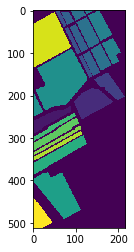

In [3]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas = loadmat('data/Salinas.mat')['salinas']
salinas_classes = pd.read_csv('data/Salinas_classes.csv',sep='\t')['Class ']
plt.imshow(salinas_gt)
salinas_classes

The main data `salinas` is a tensor (i.e. a multi-dimensional array) of shape (512,217,224). This means we have 224 different greyscale images taken in different wavelengths. Below, I am going to reshape the data into a matrix of shape $(512\cdot 217,224)$ so that each row is a flattened matrix.

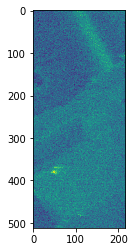

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.io import loadmat
import pandas as pd
import seaborn as sns
scaler = MinMaxScaler()
salinas_reshaped = scaler.fit_transform(salinas.reshape((512*217,224)))
salinas_gt_reshaped = salinas_gt.reshape(512*217)

plt.imshow(salinas_reshaped[:,0].reshape((512,217)))


## Question

Each pixel belongs to a specific class given by `salinas_classes`.  Form a 

1. Linear Discriminant Analysis model,
2. Support Vector Machines model,
3. Logistic Regression model,
4. Decision Tree model,
5. Boosted Tree model

to predict which pixel belongs to which class. Train and test your model and evaluate your accuracy together with a confidence interval.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X1_train, X1_test, y1_train, y1_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.2)

lda= LinearDiscriminantAnalysis(n_components= 9)

lda.fit(X1_train, y1_train)

accuracy_score(lda.predict(X1_test),y1_test)

0.814544799963998

In [6]:
from sklearn import metrics

predictions1 = lda.predict(X1_test)

cm1 = metrics.confusion_matrix(y_true=y1_test, 
                         y_pred = predictions1, 
                        labels = lda.classes_)

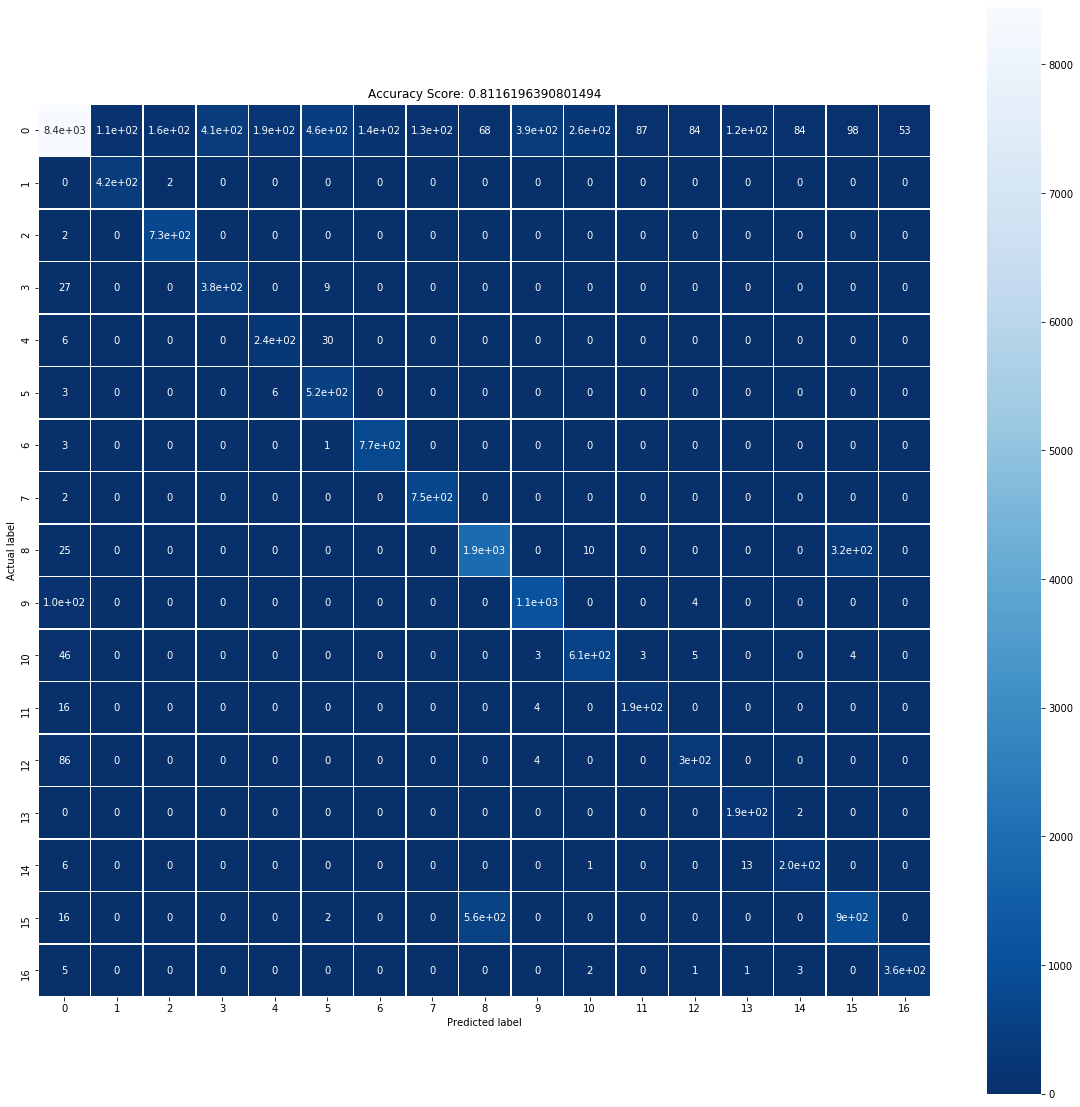

In [92]:
import seaborn as sns

score1 = lda.score(X1_test, y1_test) 

plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title);

In [8]:
from sklearn import svm

X2_train, X2_test, y2_train, y2_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.2)

svm= svm.SVC(C= 5, kernel='poly', gamma=0.05)
svm.fit(X2_train, y2_train)

accuracy_score(svm.predict(X2_test),y2_test)

0.8203951217316953

In [9]:
predictions2 = svm.predict(X2_test)

cm2 = metrics.confusion_matrix(y_true=y2_test, 
                         y_pred = predictions2, 
                        labels = svm.classes_)

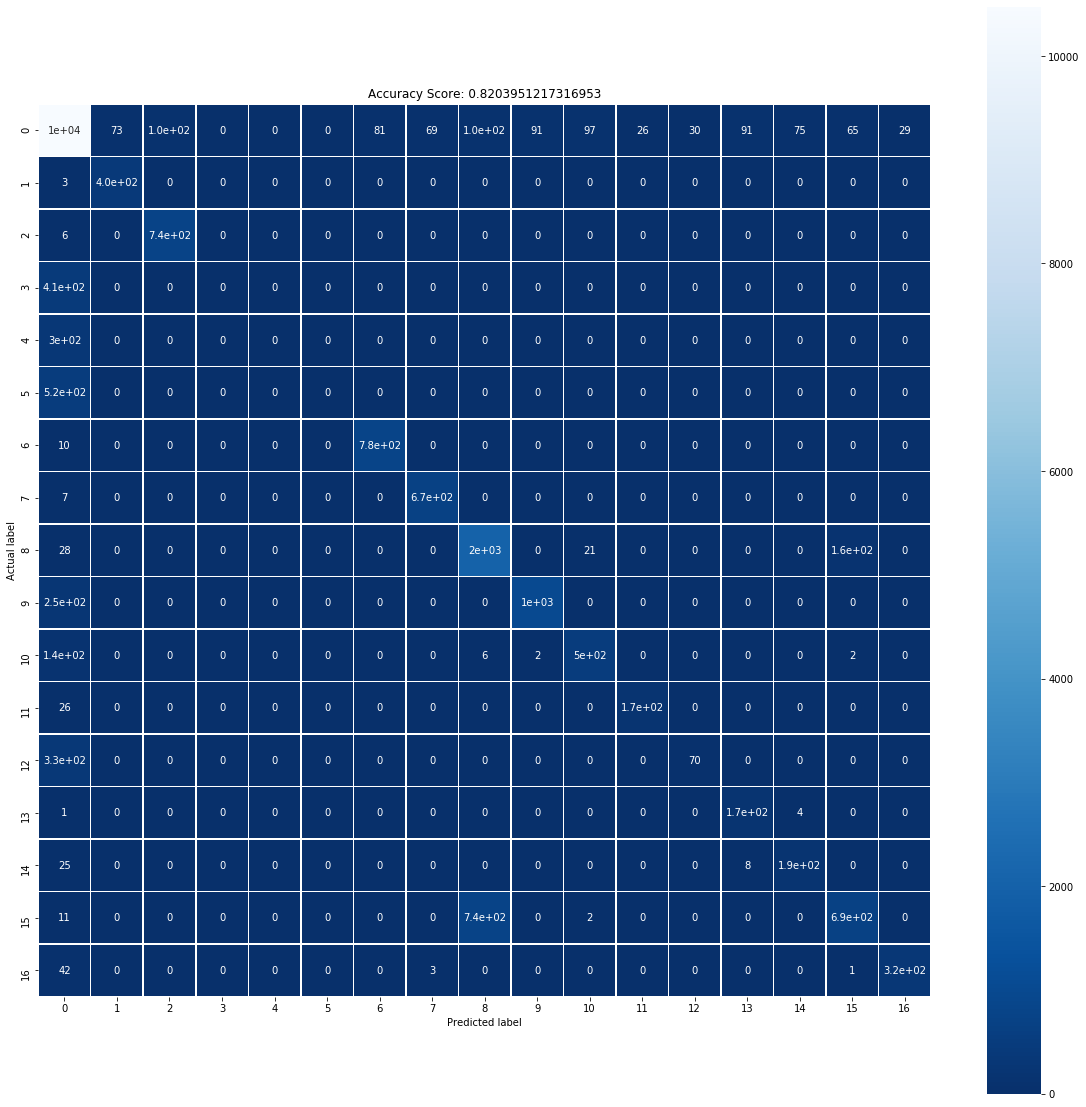

In [10]:
import seaborn as sns

score2 = svm.score(X2_test, y2_test) 

plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title);

In [38]:
from sklearn.linear_model import LogisticRegression



X3_train, X3_test, y3_train, y3_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.2)


lr= LogisticRegression(max_iter= 8000, solver= 'lbfgs')
lr.fit(X3_train, y3_train)

accuracy_score(lr.predict(X3_test),y3_test)

0.7859232257774178

In [41]:
predictions3 = lr.predict(X3_test)

cm3 = metrics.confusion_matrix(y_true=y3_test, 
                         y_pred = predictions3, 
                        labels = lr.classes_)

In [ ]:
score3 = lr.score(X3_test, y3_test) 

plt.figure(figsize=(20,20))
sns.heatmap(cm3, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score3)
plt.title(all_sample_title);

In [16]:
from sklearn.tree import DecisionTreeClassifier

X4_train, X4_test, y4_train, y4_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.2)

dt= DecisionTreeClassifier()

dt.fit(X4_train, y4_train)

accuracy_score(dt.predict(X4_test),y4_test)

0.8925790918500518

In [17]:
predictions4 = dt.predict(X4_test)

cm4 = metrics.confusion_matrix(y_true=y4_test, 
                         y_pred = predictions4, 
                        labels = dt.classes_)

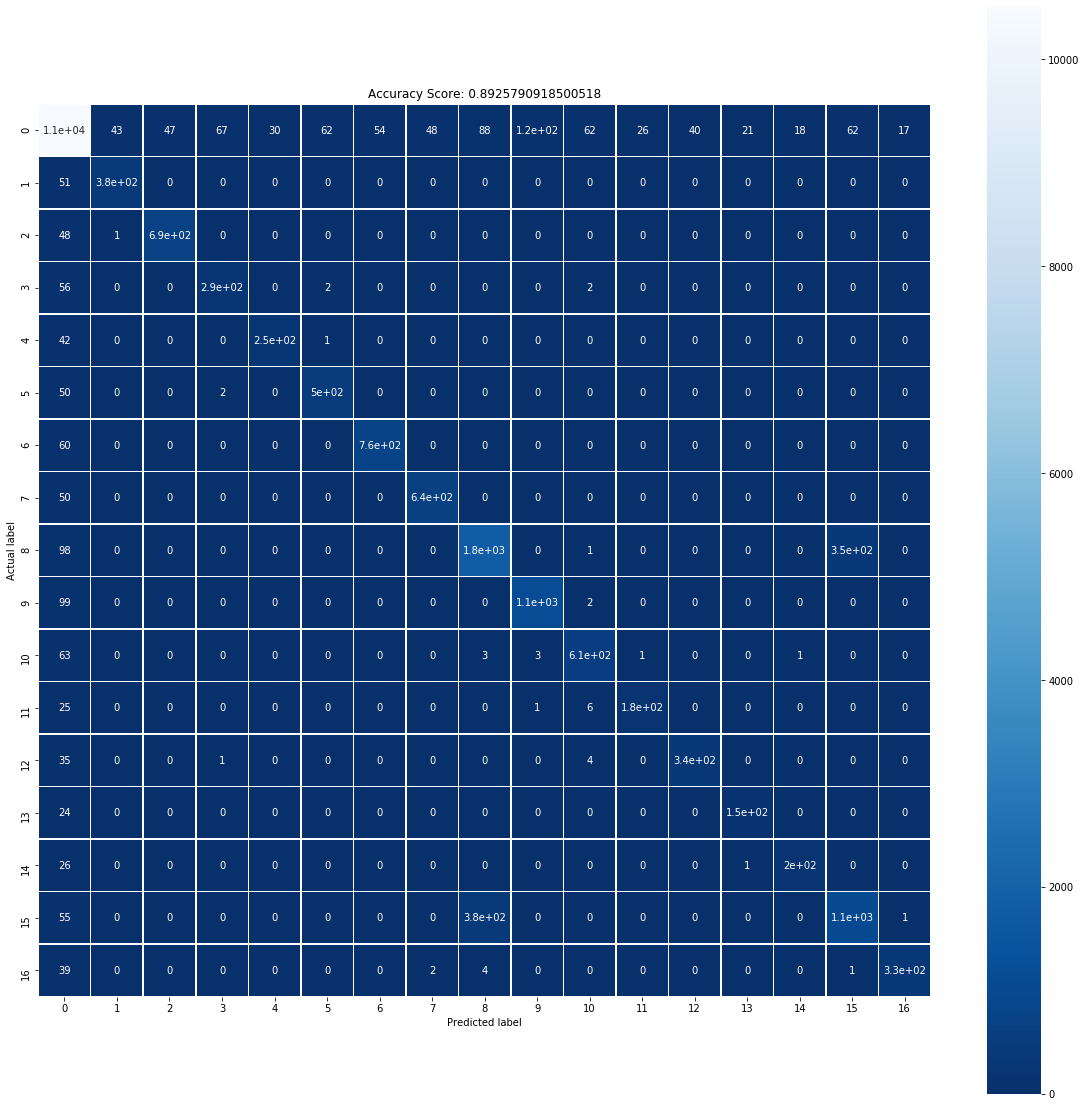

In [18]:
score4 = dt.score(X4_test, y4_test) 

plt.figure(figsize=(20,20))
sns.heatmap(cm4, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score4)
plt.title(all_sample_title);

In [20]:
from sklearn.ensemble import AdaBoostClassifier

X5_train, X5_test, y5_train, y5_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.2)

bc= AdaBoostClassifier(n_estimators=100, random_state=20)

bc.fit(X5_train, y5_train)

accuracy_score(bc.predict(X5_test),y5_test)

0.516628414562801

In [21]:
predictions5 = bc.predict(X5_test)

cm5 = metrics.confusion_matrix(y_true=y5_test, 
                         y_pred = predictions5, 
                        labels = bc.classes_)

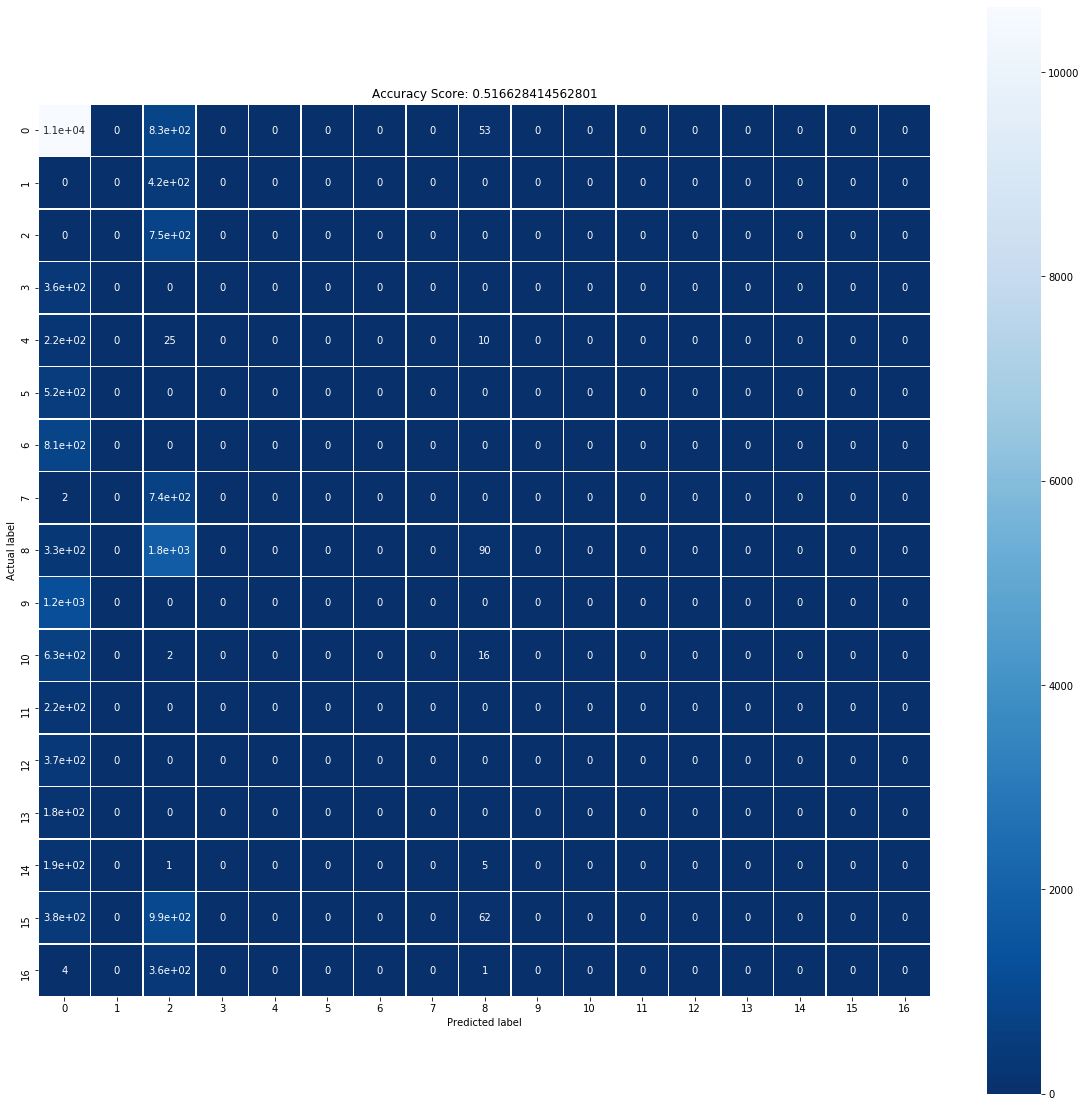

In [22]:
score5 = bc.score(X5_test, y5_test) 

plt.figure(figsize=(20,20))
sns.heatmap(cm5, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score5)
plt.title(all_sample_title);

In [ ]:
from scipy.stats import t
from sklearn import svm
def ImageReg(which='LDA'):
    X_train, X_test, y_train, y_test = train_test_split(salinas_reshaped,salinas_gt_reshaped,test_size=0.2)
    if which == 'SVM':
            model= svm.SVC(C= 5, kernel='poly', gamma=0.05)
            
            
    elif which == 'LG':
            model= LogisticRegression(max_iter= 8000, solver= 'lbfgs')
    
    elif which == 'DT':
            model= DecisionTreeClassifier()
            
    elif which== 'BC':
            model= AdaBoostClassifier(n_estimators=100, random_state=20)
        
    else:
            model= LinearDiscriminantAnalysis(n_components= 9)
            
    model.fit(X_train,y_train)
    return accuracy_score(model.predict(X_test),y_test)

In [ ]:
def ConfInter(exp):
    mu = np.mean(exp)
    s.dev = np.std(exp)

    return t.interval(0.95, len(exp)-1, loc=mu, scale=s.dev)

In [ ]:
exp = [ImageReg('LDA') for i in range(7)]

ConfInter(exp)

accuracy with 95% confidence interval;

    Linear Discriminant Analysis model: 
    Support Vector Machines model     :
    Logistic Regression model         : (0.7792908173538782, 0.7925556342009572)
    Decision Tree model               : 
    Boosted Tree model                : 